In [1]:
import os, sys, json
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
from tqdm import tqdm
from os import listdir
from PIL import Image, ImageFile
# ImageFile.LOAD_TRUNCATED_IMAGES = True
import numpy as np

In [2]:
dataPath = '/media/MyDataStor2/zhanghex/coco2017'
dataType = 'captions'
split = 'val2017'
annFile = os.path.join(dataPath, 'annotations', '%s_%s.json' % (dataType, split))

In [3]:
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


In [4]:
img = coco.dataset['images']
print('Total number of images: %d' % len(img))
print('Image example: ' + str(img[0]) + '\n')

ann = coco.dataset['annotations']
print('Total number of annotations: %d' % len(ann))
print('Annotation example: ' + str(ann[0]))

Total number of images: 5000
Image example: {'license': 4, 'file_name': '000000397133.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg', 'height': 427, 'width': 640, 'date_captured': '2013-11-14 17:02:52', 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg', 'id': 397133}

Total number of annotations: 25014
Annotation example: {'image_id': 179765, 'id': 38, 'caption': 'A black Honda motorcycle parked in front of a garage.'}


In [5]:
annIds = coco.getAnnIds(imgIds=[37777])
annTars = coco.loadAnns(ids=annIds)
coco.showAnns(annTars)

The dining table near the kitchen has a bowl of fruit on it.
A small kitchen has various appliances and a table.
The kitchen is clean and ready for us to see.
A kitchen and dining area decorated in white.
A kitchen that has a bowl of fruit on the table.


### Check for the broken COCO images

In [6]:
# check val imgs
tmpDir = 'broken_images_val'
tmpDir = os.path.join(dataPath, tmpDir)
if not os.path.exists(tmpDir):
    os.makedirs(tmpDir)
# valDir = os.path.join(dataPath, split)

valImgs = [it['file_name'] for it in img]

In [7]:
for f in tqdm(valImgs):
    filename = os.path.join(dataPath, split, f)
    try:
        im = Image.open(filename)
        im.verify()
        im.close()
        im = Image.open(filename) 
        im.transpose(Image.FLIP_LEFT_RIGHT)
        im.close()
#     except(IOError, SyntaxError) as e:
    except:
        print('Bad file: %s' % f)

100%|██████████| 5000/5000 [01:08<00:00, 73.26it/s]


In [8]:
# check train imgs
split_tr = 'train2017'
annFile_tr = os.path.join(dataPath, 'annotations', '%s_%s.json' % (dataType, split_tr))
coco_tr = COCO(annFile_tr)
img_tr = coco_tr.dataset['images']
print('Total number of images: %d' % len(img_tr))
ann_tr = coco_tr.dataset['annotations']
print('Total number of annotations: %d' % len(ann_tr))
annIds = coco_tr.getAnnIds(imgIds=[404464])
annTars = coco_tr.loadAnns(ids=annIds)
coco_tr.showAnns(annTars)

loading annotations into memory...
Done (t=1.09s)
creating index...
index created!
Total number of images: 118287
Total number of annotations: 591753
 Persons skating in the ice skating rink on the skateboard.
A snowboard sliding very gently across the snow in an enclosure.
A person on a snowboard getting ready for competition.
Man on snowboard riding under metal roofed enclosed area.
A snowboarder practicing his moves at a snow facility.


In [10]:
tmpDir_tr = 'broken_images_train'
tmpDir_tr = os.path.join(dataPath, tmpDir_tr)
if not os.path.exists(tmpDir_tr):
    os.makedirs(tmpDir_tr)
# trDir = os.path.join(dataPath, split_tr)

trImgs = [it['file_name'] for it in img_tr]

In [11]:
for f in tqdm(trImgs):
    filename = os.path.join(dataPath, split_tr, f)
    try:
        im = Image.open(filename)
        im.verify()
        im.close()
        im = Image.open(filename) 
        im.transpose(Image.FLIP_LEFT_RIGHT)
        im.close()
    except:
        print('Bad file: %s' % f)

100%|██████████| 118287/118287 [21:19<00:00, 92.47it/s] 


## Download the corrupted images

In [109]:
brk_imgs = [440124, 450098, 459987, 413497, 257323, 150650]
coco_tr.download(tarDir=tmpDir_tr, imgIds=brk_imgs)

downloaded 0/6 images (t=0.0s)
downloaded 1/6 images (t=0.2s)
downloaded 2/6 images (t=0.4s)
downloaded 3/6 images (t=0.2s)
downloaded 4/6 images (t=0.1s)
downloaded 5/6 images (t=0.2s)


(427, 640, 3)


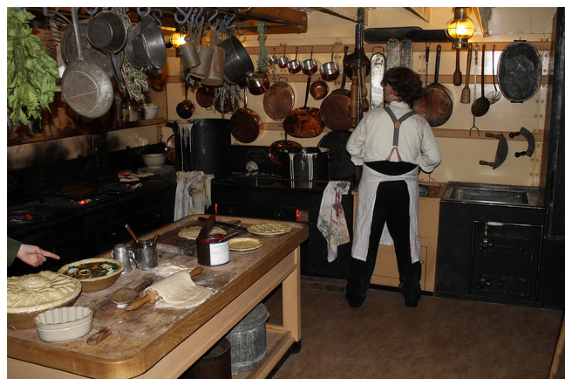

In [7]:
im = Image.open(os.path.join(dataPath, split, '000000397133.jpg'))
arr = np.array(im)
print(arr.shape)
plt.imshow(im)
# plt.imshow(im.transpose(Image.FLIP_LEFT_RIGHT))
plt.axis('off')
plt.show()

In [111]:
im = Image.open(os.path.join(tmpDir_tr, '000000150650.jpg'))
arr = np.array(im)
arr.shape

(640, 636, 3)

In [123]:
# double check the corrupted images
for f in [440124, 450098, 459987, 413497, 257323, 150650]:
    filename = os.path.join(dataPath, split_tr, '%012d.jpg' % f)
    try:
        im = Image.open(filename)
        im.verify()
        im.close()
        im = Image.open(filename) 
        im.transpose(Image.FLIP_LEFT_RIGHT)
        im.close()
    except:
        print('Bad file: %s' % f)